In [1]:
import datetime
import pandas as pd
import json
import os

with open('data/overlap/overlaps.json', 'r', encoding='UTF-8') as f:
    overlaps = json.load(f)
    
novel_words = {}

for file in overlaps:
    novel_words[file] = []
    for el in overlaps[file]:
        if el in ['h', 't']:
            for ngram in overlaps[file][el]:
                if isinstance(overlaps[file][el][ngram], float):
                    novel_words[file].append(overlaps[file][el][ngram])
                else:
                    novel_words[file].append(None)
            
columns = ['h_novel_1', 'h_novel_2', 'h_novel_3', 'h_novel_4', \
           't_novel_1', 't_novel_2', 't_novel_3', 't_novel_4']

df = pd.DataFrame.from_dict(novel_words, orient='index', columns=columns)

article_len = []
heading_len = []
title_len = []
dates = []
for idx, file in enumerate(overlaps):
    with open(os.path.join('data/docs/parsed', file), 'r', encoding='UTF-8') as f:
        doc = json.load(f)
    article_len.append(len(doc['article'].split()))
    heading_len.append(len(doc['heading'].split()))
    title_len.append(len(doc['title'].split()))
    dates.append(datetime.datetime.strptime(doc['date'], '%Y-%m-%d'))
        
df['article_len'] = article_len
df['heading_len'] = heading_len
df['title_len'] = title_len
df['dates']= dates
df['year'] = pd.DatetimeIndex(df['dates']).year
df['heading_article_len_ratio'] = df['heading_len'] / df['article_len']

In [2]:
df.head()

,h_novel_1,h_novel_2,h_novel_3,h_novel_4,t_novel_1,t_novel_2,t_novel_3,t_novel_4,article_len,heading_len,title_len,dates,year,heading_article_len_ratio
10.json,35.5,87.1,93.3,96.6,33.3,81.8,90.0,100.0,539,32,12,2020-07-02,2020,0.059369
1000.json,25.9,58.1,83.9,93.3,20.0,60.0,100.0,100.0,291,33,11,2020-06-15,2020,0.113402
10000.json,19.2,40.7,53.8,68.0,20.0,75.0,100.0,100.0,109,28,6,2017-11-18,2017,0.256881
10001.json,50.0,91.7,100.0,100.0,12.5,62.5,85.7,100.0,170,13,10,2017-11-22,2017,0.076471
10002.json,100.0,100.0,NaN,NaN,38.5,66.7,81.8,90.0,234,2,15,2018-08-07,2018,0.008547


In [3]:
print(len(df.loc[df['heading_len'] < 5])) # too many, let's discard them
df = df.loc[df['heading_len'] >= 5]

6529


In [4]:
df[['h_novel_1', 'h_novel_2', 'heading_len','heading_article_len_ratio']].corr()

,h_novel_1,h_novel_2,heading_len,heading_article_len_ratio
h_novel_1,1.000000,0.842821,0.288471,0.493383
h_novel_2,0.842821,1.000000,0.248969,0.289449
heading_len,0.288471,0.248969,1.000000,0.487751
heading_article_len_ratio,0.493383,0.289449,0.487751,1.000000


Important correlation between h_novel_1 and heading_article_len_ratio

### __% novel ngrams Distribution__

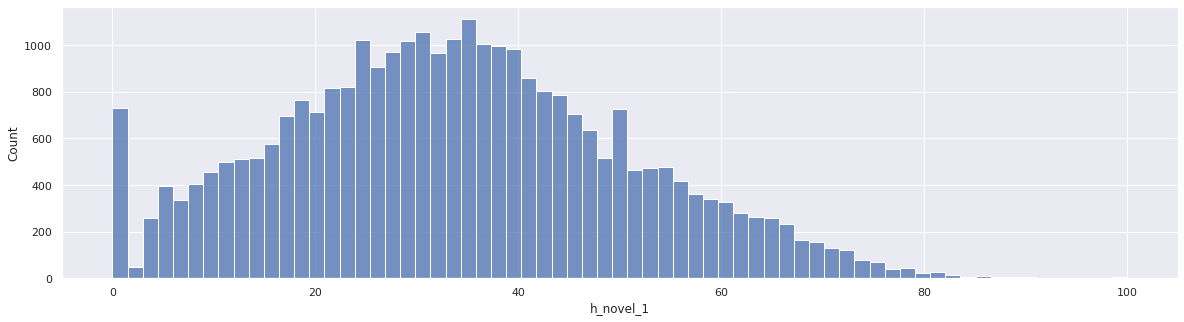

In [5]:
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.histplot(data=df, x="h_novel_1")

### __Distribution shift over years__

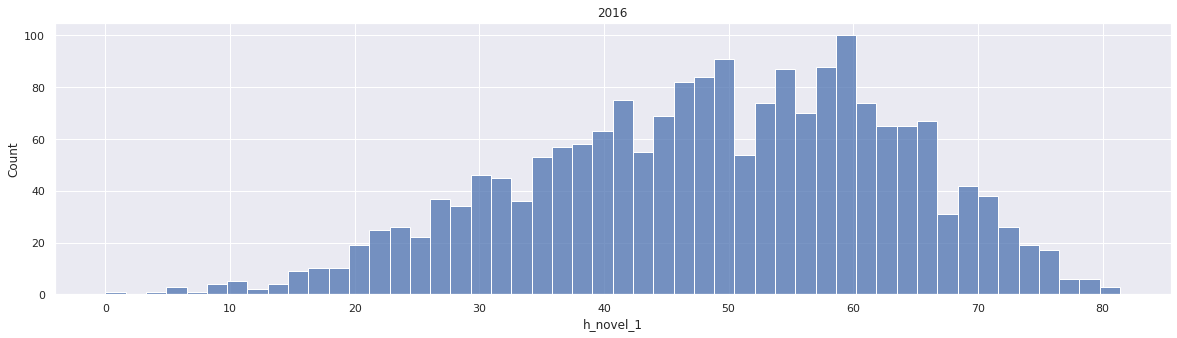

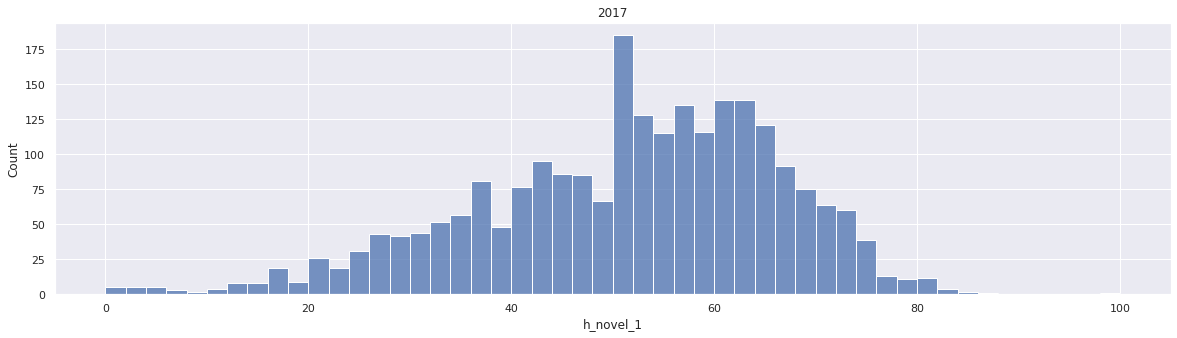

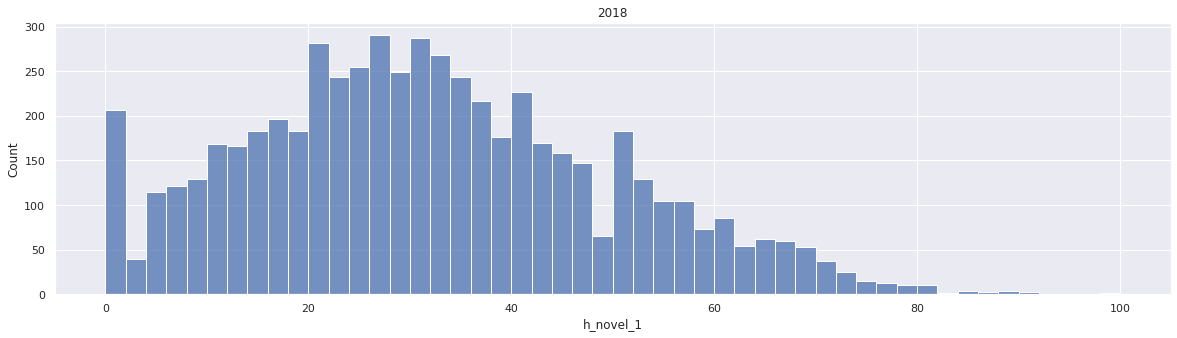

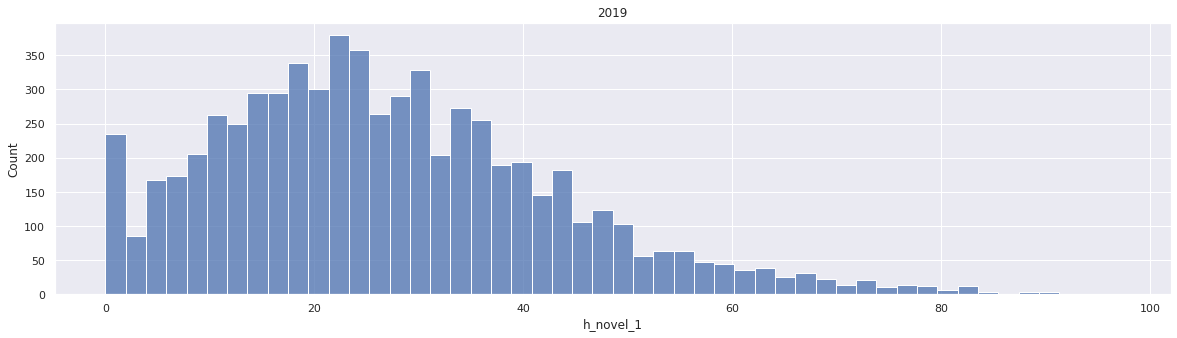

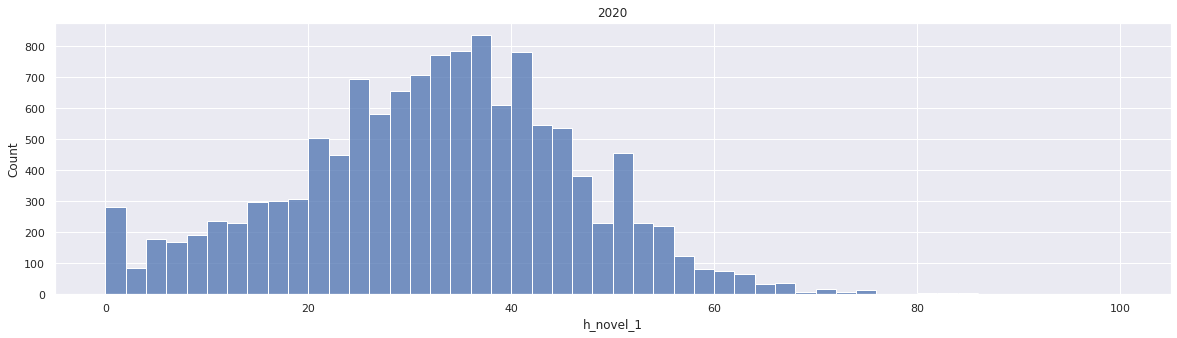

In [6]:
for year in range(2016, 2021):
    plt.figure(figsize=(20,5)) 
    sns.histplot(data=df.loc[(df['year'] == year)], x="h_novel_1", bins=50)
    plt.title(year)

There is a clear shift in the distribution over years. <br>
Let's compare 2016 and 2020 closely:

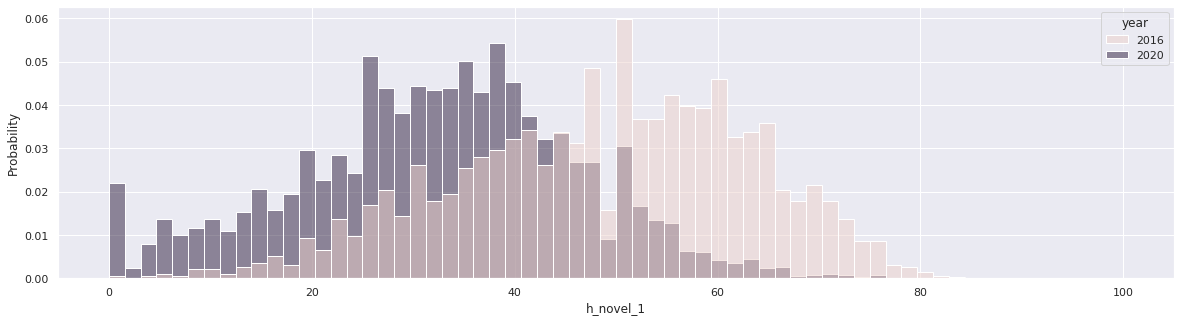

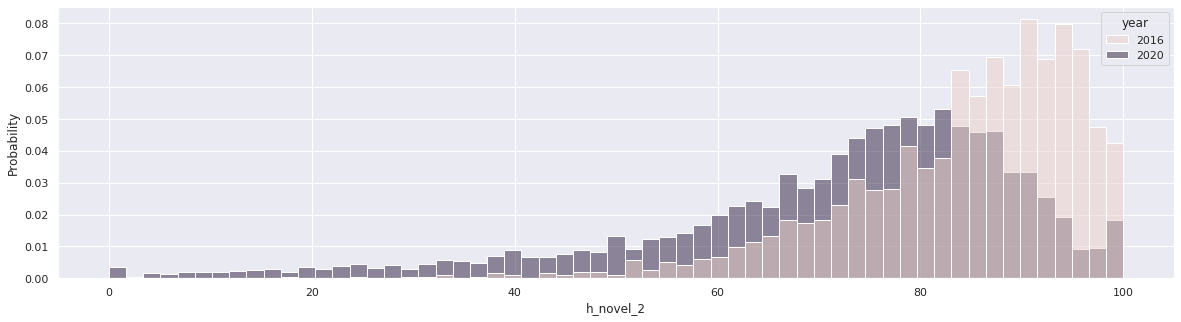

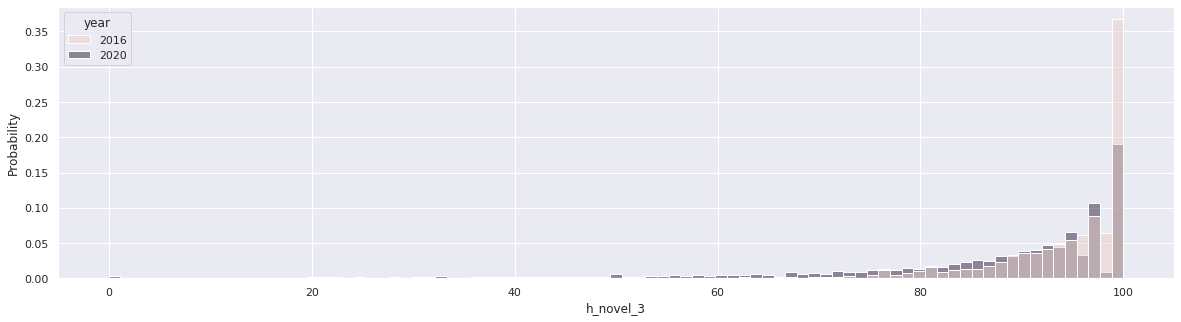

In [7]:
for n in [1,2,3]:
    plt.figure(figsize=(20,5))
    sns.histplot(data=df.loc[((df['year'] == 2020)) | (df['year'] == 2016)],
                 x="h_novel_{}".format(str(n)), hue="year", stat="probability", common_norm=False)

Now let's check the distribution of heading_article_len_ratio in 2016 and 2020

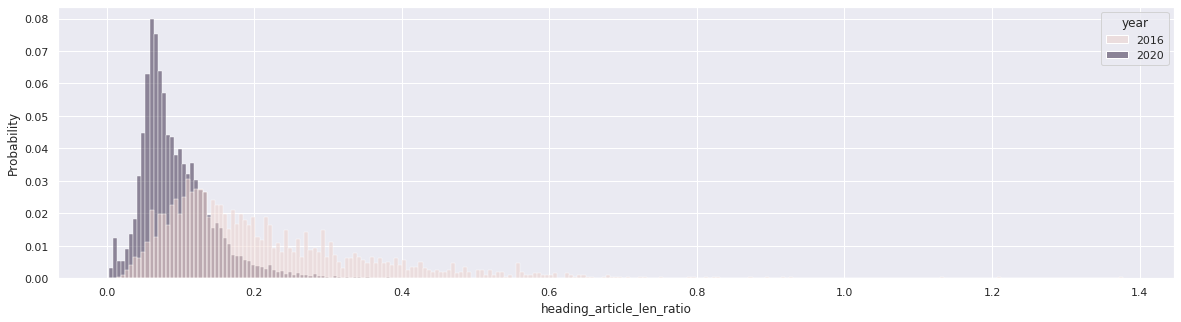

In [8]:
plt.figure(figsize=(20,5))
sns.histplot(data=df.loc[((df['year'] == 2020)) | (df['year'] == 2016)],
             x="heading_article_len_ratio".format(str(n)), hue="year", stat="probability", common_norm=False)

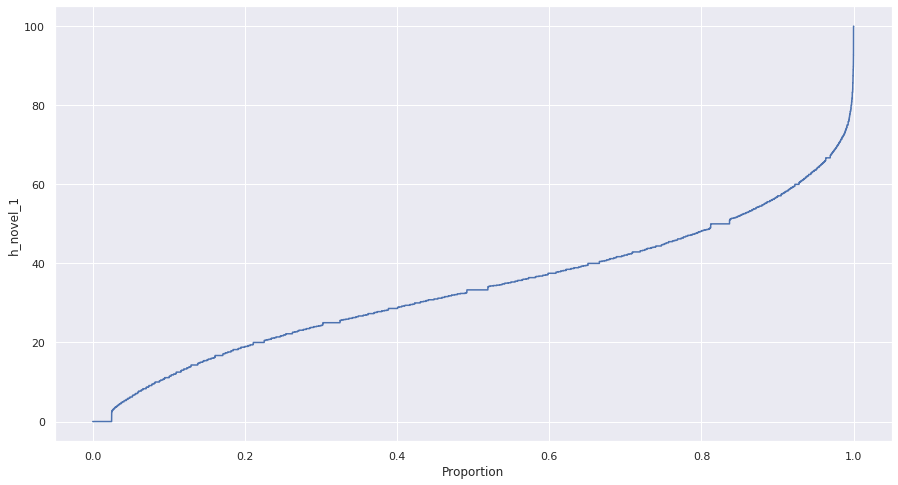

In [9]:
plt.figure(figsize=(15,8))
sns.ecdfplot(data=df[['h_novel_1']], y="h_novel_1")

In [15]:
df.loc[df['h_novel_1'] > 50]['h_novel_1'][:40]

10015.json     54.5
1002.json      57.1
10027.json     58.5
10029.json     63.6
10030.json     59.1
10031.json     51.7
10032.json     62.7
10038.json     64.5
10040.json    100.0
10054.json     57.1
10064.json     53.8
1009.json      52.6
10091.json     62.9
10092.json     65.8
10097.json     64.0
10126.json     85.7
10139.json     54.5
10147.json     72.1
10148.json     63.3
10152.json     56.0
10153.json     65.5
10165.json     56.2
10174.json     52.8
10177.json     59.3
10188.json     51.9
10191.json     63.6
10193.json     51.9
10200.json     62.5
10210.json     62.1
10211.json     53.8
10213.json     66.7
10215.json     65.2
10216.json     65.2
10219.json     56.9
10221.json     72.0
10223.json     66.0
1023.json      52.0
10245.json     59.3
10254.json     53.8
10255.json     63.6
Name: h_novel_1, dtype: float64